In [16]:
from IPython.display import HTML, IFrame, YouTubeVideo, Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
matplotlib.style.use('seaborn-talk')

# "Tidy" Data in Python: Embracing the Long DataFrame

## Nick Del Grosso, PyData München

In [18]:
IFrame('https://www.tidyverse.org/', width=800, height=600)

## Today's Packages

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import pandas as pd

In [21]:
import seaborn as sns

## Today's Data will be...

In [22]:
from statsmodels import datasets
IFrame('http://www.statsmodels.org/stable/datasets/index.html', width=900, height=600)

## Our Sample Dataset for the Evening: World Fertility Rates!

![title](https://mereorthodoxy.com/wp-content/uploads/2017/05/landscape_movies-children-of-men.jpg)

## Downloading the Data

In [48]:
from statsmodels import datasets
df = datasets.fertility.load_pandas().data
df.columns = df.columns.str.replace(' ', '')
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


In [24]:
df.to_csv('worldbankdata.csv')

## The "DataFrame" Package": Pandas

In [25]:
IFrame('http://pandas.pydata.org/', width=800, height=600)

## Review of Pandas: Summarizing, Filtering, Selecting, Transforming, Aggregating, and Plotting

In [26]:
df2 = df.copy()
# df2 = df2.set_index('CountryName')
df2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


In [27]:
for col in ['CountryCode', 'IndicatorName', 'IndicatorCode']:
    del df2[col]
df2.set_index('CountryName', inplace=True)
df2.columns.name = 'Year'
df2.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,NaN,NaN
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,NaN,NaN
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,NaN,NaN


(0, 2.605)

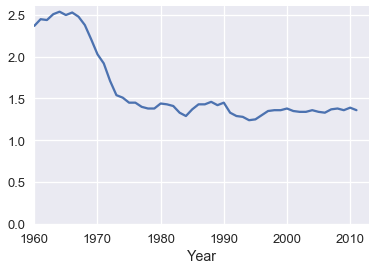

In [28]:
ax = df2.loc['Germany'].plot()
ax.set_ylim(0, ax.get_ylim()[1])

## Question: How Has Germany's Fertility Rate Changed over Time?

### Minor Note:  Handling NaNs

In [29]:
df2 = df2.T.iloc[:-3].T
df2.fillna(method='bfill', limit=3, axis=1, inplace=True)
df2.dropna(inplace=True)

In [30]:
df2.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.848,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.623,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.811,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.291,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741
United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,6.679,...,2.532,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868


## Low-Level Approach: Pull Data Out to NumPy, then Analyze with Matplotlib

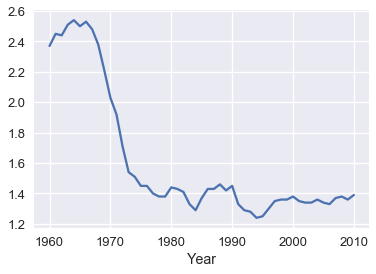

In [31]:
df3 = df2.reset_index()
germany = df3[df3['CountryName'] == 'Germany']
frate = germany.values[0, 1:]
years = germany.columns[1:].astype(int)
plt.plot(years, frate)
plt.xlabel('Year')
plt.ylabel('')
# df2.head()

# Pandas Approach: Reshape and Delete to New Wide Table
Goal: Get Columns Labeled as Country Names, and Rows labeled as Years

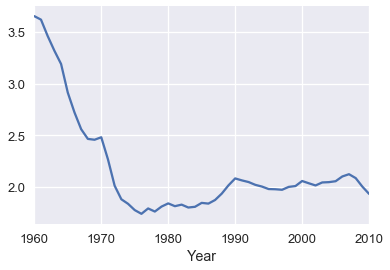

In [32]:
df2.loc['United States'].plot()

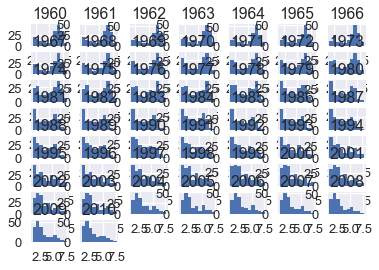

In [33]:
df2.hist();

# New Question: How has each Continent's Fertility Changed over Time?
**Problem**: I don't know the Continent name of every country. :-(
**Solution**: Look for Data online!

In [34]:
IFrame('http://techslides.com/list-of-countries-and-capitals', width=1000, height=600)

## Using Pandas to Scrape HTML Tables from Web Sites

In [35]:
countries = pd.read_html('http://techslides.com/list-of-countries-and-capitals', header=0)[0].set_index('Country Name')
countries.head()

,Capital Name,Capital Latitude,Capital Longitude,Country Code,Continent Name
Country Name,,,,,
Afghanistan,Kabul,34.516667,69.183333,AF,Asia
Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe
Albania,Tirana,41.316667,19.816667,AL,Europe
Algeria,Algiers,36.750000,3.050000,DZ,Africa
American Samoa,Pago Pago,-14.266667,-170.700000,AS,Australia


# Problem: Where Should the Data Go?
How do we cleanly associate our variables (Country, Continent, and our Years) in a 2D Structure?

In [36]:
df2.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,3.054,...,1.848,1.825,1.805,1.786,1.769,1.754,1.739,1.726,1.713,1.701
Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.623,7.484,7.321,7.136,6.930,6.702,6.456,6.196,5.928,5.659
Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,7.339,...,6.811,6.778,6.743,6.704,6.657,6.598,6.523,6.434,6.331,6.218
Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,5.160,...,2.291,2.195,2.097,2.004,1.919,1.849,1.796,1.761,1.744,1.741
United Arab Emirates,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,6.679,...,2.532,2.428,2.329,2.236,2.149,2.071,2.004,1.948,1.903,1.868


## Our Options: Long Variable Names, Panels, MultiIndexing, or Long DataFrames
 
  - **Long Variable Names**: "Europe_Germany".  Ugly.
  - **Panel**: a 3D version of DataFrame.  However, it has been Deprecated.
  - **MultiIndex**: Allows multiple nesting of columns. Works, but not fully supported--it's a bit finicky in practice.
  - **Long DataFrames**: Clean, Simple to Use, and Scalable!
  

In [37]:
df3 = df2.reset_index()
dfl = df3.melt(id_vars=['CountryName'], var_name='Year', value_name='FertilityRate', 
         value_vars=[col for col in df3.columns if col.isdigit()])
dfl.head()

,CountryName,Year,FertilityRate
0,Aruba,1960,4.820
1,Afghanistan,1960,7.671
2,Angola,1960,7.316
3,Albania,1960,6.186
4,United Arab Emirates,1960,6.928


## Grouping Data using Dataframe.groupby()

In [38]:
dfl.groupby('Year').FertilityRate.mean().head()

Year
1960    5.511814
1961    5.506021
1962    5.491603
1963    5.471747
1964    5.441701
Name: FertilityRate, dtype: float64

## "Gathering" Data: Reshaping into a  "Long" Table with Pandas' melt() function

## Joining DataFrames using "Join" and "Merge"

In [39]:
dfl2 = pd.merge(dfl, countries[['Continent Name']], left_on='CountryName', right_index=True)
dfl2.head()

,CountryName,Year,FertilityRate,Continent Name
0,Aruba,1960,4.820,North America
194,Aruba,1961,4.655,North America
388,Aruba,1962,4.471,North America
582,Aruba,1963,4.271,North America
776,Aruba,1964,4.059,North America


In [40]:
df3 = df2.join(countries['Continent Name']).reset_index()


## A Benefit of Long DataFrames: Simpler Querying

In [49]:
dfl.head()

,CountryName,Year,FertilityRate
0,Aruba,1960,4.820
1,Afghanistan,1960,7.671
2,Angola,1960,7.316
3,Albania,1960,6.186
4,United Arab Emirates,1960,6.928


# Building Beautiful Plots with Seaborn

In [50]:
IFrame('http://seaborn.pydata.org/', width=800, height=600)

## Use Case: Time Series Plotting with Seaborn.tsplot()
It's a bit finicky (especially with NaNs), but it handles error shading in a great way!

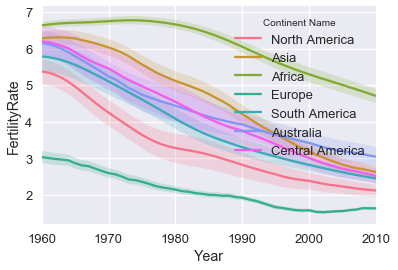

In [51]:
sns.tsplot(data=dfl2, time='Year', value='FertilityRate', condition='Continent Name', unit='CountryName')

## Use Case: Plotting Categorical Data with a Declarative Syntax

In [52]:
dfl2['Decade'] = (dfl.Year.astype(float) // 10 * 10).astype(int)
dfl2.head()

,CountryName,Year,FertilityRate,Continent Name,Decade
0,Aruba,1960,4.820,North America,1960
194,Aruba,1961,4.655,North America,1960
388,Aruba,1962,4.471,North America,1960
582,Aruba,1963,4.271,North America,1960
776,Aruba,1964,4.059,North America,1960


## Use Case: Building Complex Subplots with FacetGrid.map()

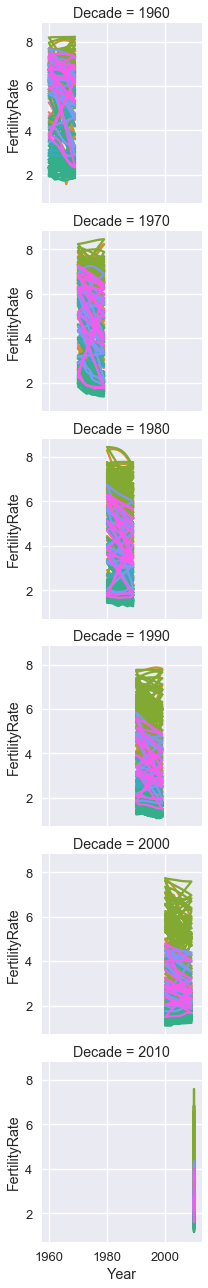

In [53]:
g = sns.FacetGrid(data=dfl2, hue='Continent Name', row='Decade')
g.map(plt.plot, 'Year', 'FertilityRate')

## Seaborn's Killer Function:  factorplot()

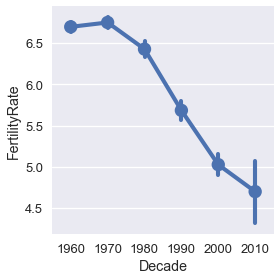

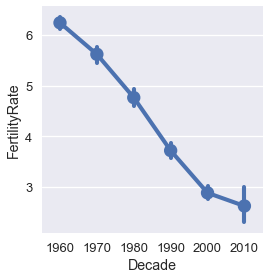

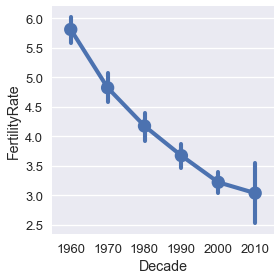

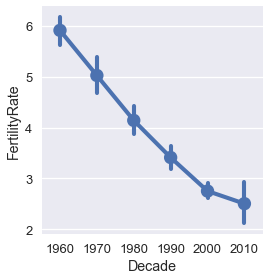

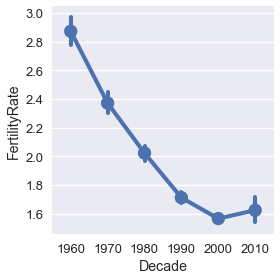

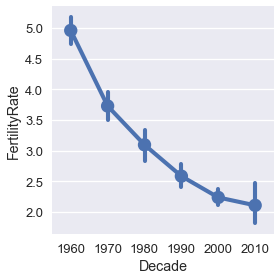

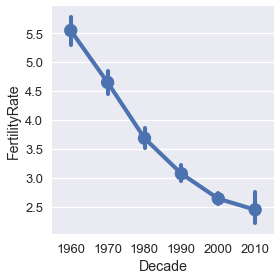

In [54]:
for cnt, dd in dfl2.groupby('Continent Name'):
    fig = plt.figure()
    sns.factorplot(data=dd, x='Decade', y='FertilityRate')
    fig.savefig('test_{}.png'.format(cnt))

In [55]:
ls

Long Pandas Talk-Copy1.ipynb   test_Australia.png
Long Pandas Talk.ipynb         test_Central America.png
README.md                      test_Europe.png
oktoberfestgesamt19852016.csv  test_North America.png
requirements.txt               test_South America.png
test_Africa.png                worldbankdata.csv
test_Asia.png


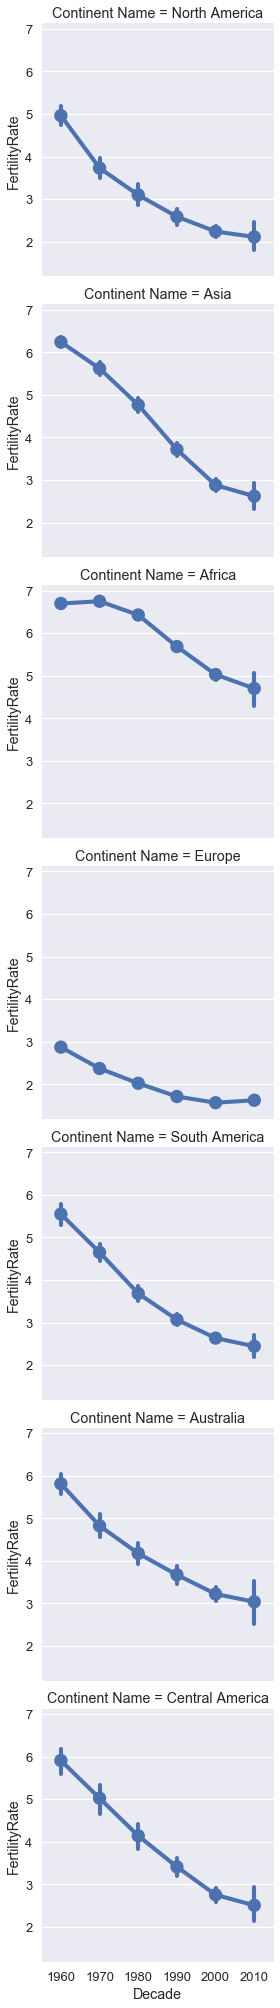

In [56]:
sns.factorplot(data=dfl2, x='Decade', y='FertilityRate', row='Continent Name', )

# Doing R-Like Statistics with StatsModels

In [57]:
IFrame('http://www.statsmodels.org/stable/index.html', width=900, height=600)

## Statsmodels Uses a Statistical Modeling Sub-Language called Patsy

In [58]:
import statsmodels.formula.api as smf

In [59]:
dfl2['Year'] = dfl2.Year.astype(int)

In [60]:
dfl2['Continent'] = dfl2['Continent Name']
model = smf.glm(data=dfl2, formula='FertilityRate ~ Year * Continent')
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          FertilityRate   No. Observations:                 8415
Model:                            GLM   Df Residuals:                     8401
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                   1.20287941865
Method:                          IRLS   Log-Likelihood:                -12711.
Date:                Wed, 22 Nov 2017   Deviance:                       10105.
Time:                        16:47:32   Pearson chi2:                 1.01e+04
No. Iterations:                     2                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            94.3549      3.021     31.233      0.000      88.434     100.276
Continent[T.Asia]                    79.7746      4.624     17.252      0.000      70.712      88.838
Continent[T.Australia]               34.1834      6.699      5.103      0.000      21.054      47.313
Continent[T.Central America]         65.5491      7.213      9.088      0.000      51.413      79.686
Continent[T.Europe]                 -29.3019      4.455     -6.577      0.000     -38.034     -20.570
Continent[T.North America]           37.7416      7.213      5.233      0.000      23.605      51.878
Continent[T.South America]           54.1501      6.937      7.806      0.000      40.554      67.746
Year                                 -0.0445      0.002    -29.218      0.000      -0.047      -0.041
Year:Continent[T.Asia]               -0.0409      0.002    -17.574      0.000      -0.046      -0.036
Year:Continent[T.Australia]          -0.0181      0.003     -5.368      0.000      -0.025      -0.011
Year:Continent[T.Central America]    -0.0340      0.004     -9.348      0.000      -0.041      -0.027
Year:Continent[T.Europe]              0.0128      0.002      5.682      0.000       0.008       0.017
Year:Continent[T.North America]      -0.0204      0.004     -5.620      0.000      -0.028      -0.013
Year:Continent[T.South America]      -0.0284      0.003     -8.123      0.000      -0.035      -0.022
=====================================================================================================
"""

# Want to Explore More?  Why Not OktoberFest?

In [61]:
IFrame('https://www.opengov-muenchen.de/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2', width=800, height=600)

In [62]:
okt = pd.read_csv('oktoberfestgesamt19852016.csv')
okt.head()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674
